Data Source - http://www.stat.ufl.edu/~winner/datasets.html
Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat
Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt
Dataset: airq402.dat
Source: U.S. Department of Transportation

Description: Airfares and passengers for U.S. Domestic Routes for 4th Quarter of 2002.
Variables/Columns
City1 1-3
City2 5-7
Average Fare 11-17
Distance 20-23
Average weekly passengers 26-33
market leading airline 36-37
market share 40-45
Average fare 48-54
Low price airline 57-58
market share 61-66
price 69-75



Assignment Expectations/Steps -
Part 1:
● Load the data using Python Pandas library.
● Do Exploratory Data Analysis of the data and state your insights.

In [4]:
#Importing required libraries
import pandas as pd
import numpy as np
import random as rnd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# read the dat file
data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/airq402.dat',header = None, delim_whitespace=True,
error_bad_lines=False )

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [9]:
columnslst=["City1","City2","Average Fare","Distance","Average weekly passengers","market leading airline",
"market share1","Average fare","Low price airline","market share2","price"]

In [10]:

df=data.copy(deep=True)

In [11]:
# Updating column names as per the data set description

df.columns=columnslst

In [12]:
#copying to the CSV file
df.to_csv(path_or_buf="airlinedata.csv",index=True)
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [14]:
""" we can see a lot of columns above are object. They shpuld eb categorical. Hence, I would capture all convert them into categorical"""
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
#identifying the charecter / categorical columns

In [15]:
#got all categorical variables names in single list
print(char_cols)

Index(['City1', 'City2', 'market leading airline', 'Low price airline'], dtype='object')


In [16]:
# converting into categorical variables
for c in char_cols:
    df[c]= df[c].astype('category')

In [17]:
df['Average Fare']=df['Average Fare'].astype('int')

In [18]:
#data.isnull().any()
# checking missing values
df.isnull().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share1                0
Average fare                 0
Low price airline            0
market share2                0
price                        0
dtype: int64

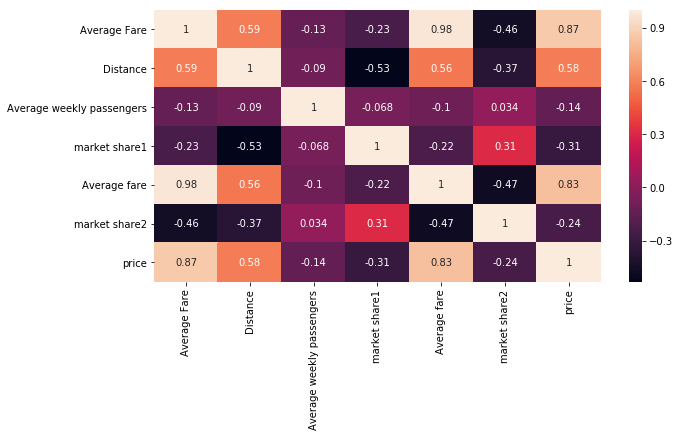

In [20]:
#Creating heat map for data visualization with correlation and coefficients
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data=df.corr(), annot=True)

Part 2:

● Treat “Average Fare” – 3rd Column as your Dependent Variable and Rest of the
columns as Independent Variable.
● Create Scatter Plot of Independent Variable vs Dependent Variable.
● Based on Scatter Plot see if there is any transformation required for
Independent Variable.
● Build Multiple Linear Regression model.
● Get the accuracy score on train and test data.

In [21]:
df1=df.copy(deep=True)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null category
City2                        1000 non-null category
Average Fare                 1000 non-null int32
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null category
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null category
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: category(4), float64(5), int32(1), int64(1)
memory usage: 62.7 KB


In [23]:
#Treat “Average Fare” – 3rd Column as your Dependent Variable and Rest of the columns as Independent Variable.
y=df1.pop('Average Fare')
X=df1

In [24]:
X1=pd.DataFrame()
for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    X1[col]=df1[col]

In [25]:
X2=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','Average fare','price']):
    X2[col]=df1[col]

In [26]:
X3=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','market share2','price']):
    X3[col]=df1[col]

In [27]:
X1.shape

(1000, 6)

In [28]:
X1.head()

,Distance,Average weekly passengers,market share1,Average fare,market share2,price
0,528,424.56,70.19,111.03,70.19,111.03
1,860,276.84,75.10,123.09,17.23,118.94
2,852,215.76,78.89,223.98,2.77,167.12
3,288,606.84,96.97,68.86,96.97,68.86
4,723,313.04,39.79,161.36,15.34,145.42


###### Create Scatter Plot of Independent Variable vs Dependent Variable

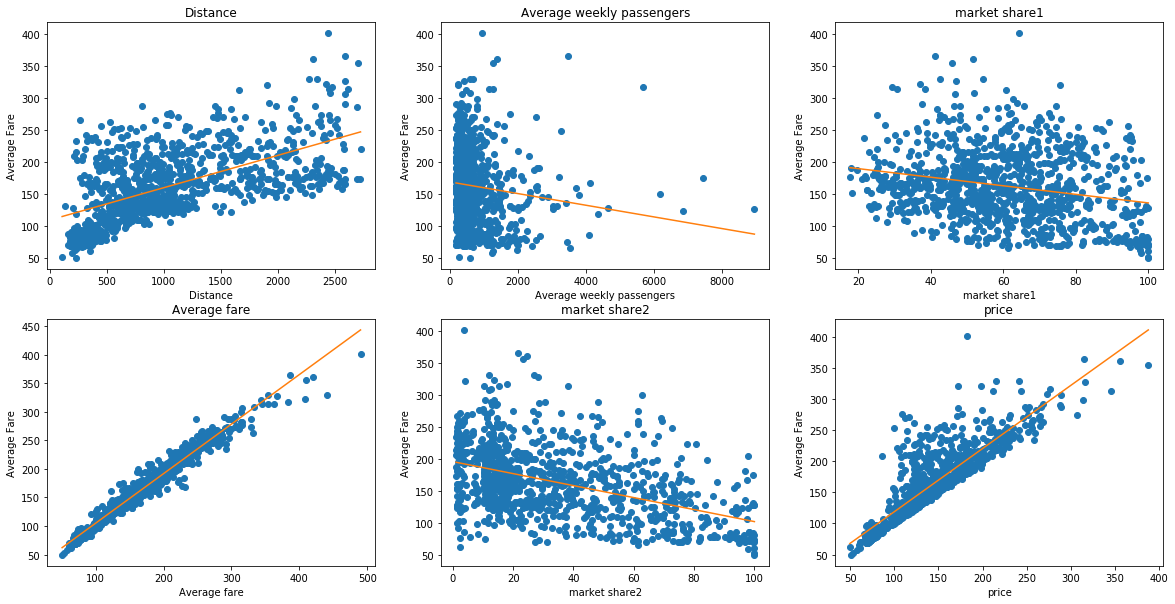

In [29]:
# Plotting the 'Distance','Average weekly passengers','market share1','Average fare','market share2','price' against 'Average Fare'
plt.figure(figsize=(20, 10))

# iterating for each column 'Distance','Average weekly passengers','market share1','Average fare','market share2','price'
for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    plt.subplot(2, 3, i+1)
    x = X[col]
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Average Fare')

###### Build Multiple Linear Regression model.

In [30]:
#Splitting the data into Dependent and independent variables
X1=pd.DataFrame()
for i, col in enumerate(['Distance','Average weekly passengers','market share1','Average fare','market share2','price']):
    X1[col]=df1[col]

In [31]:
X2=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','price']):
    X2[col]=df1[col]

X3=pd.DataFrame()
for i, col in enumerate(['Distance','market share1','market share2','price']):
    X3[col]=df1[col]

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

10.315017653929488
[ 0.00216398 -0.00100061  0.06411164  0.70826319 -0.06558595  0.21874115]


In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X2, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-5.024110846431512
[0.01554334 0.30288333 0.93059151]


In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X3, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

15.557213114620566
[ 0.00929572  0.425733   -0.56536016  0.91780805]


###### Part 3:
● Find the most important features of this dataset to predict the average fair.
● Figure out what other model can be applied to improve the model
performance.
● What are other ways this data can be improved which will help in improving the
prediction
● State your final observations after this complete analysis.

In [36]:
#Splitting the data into Dependent and independent variables
x=pd.DataFrame()
for i, col in enumerate(['Average fare','price']):
    x[col]=df1[col]

In [37]:
# Functions created for all the models to verify which on eis best
def classifyWithLogisticRegression ( trainingData, results, testData ):
    clf_logreg = LogisticRegression()
    clf_logreg.fit(trainingData, results)
    return clf_logreg.predict(testData)

def classifyWithDecisionTree ( trainingData, results, testData ):
    clf_tree = tree.DecisionTreeClassifier()
    clf_tree.fit(trainingData, results)
    return clf_tree.predict(testData)

def classifyWithSVM ( trainingData, results, testData ):
    clf_svm = SVC()
    clf_svm.fit(trainingData,results)
    return clf_svm.predict(testData)

def classifyWithPerceptron ( trainingData, results, testData ):
    clf_perceptron = Perceptron()
    clf_perceptron.fit(trainingData,results)
    return clf_perceptron.predict(testData)

def classifyWithKNeighbors ( trainingData, results, testData ):
    clf_KNN = KNeighborsClassifier()
    clf_KNN.fit(trainingData,results)
    return clf_KNN.predict(testData)

def classifyWithGaussianNaiveBayes ( trainingData, results, testData ):
    clf_GaussianNB = GaussianNB()
    clf_GaussianNB.fit(trainingData,results)
    return clf_GaussianNB.predict(testData)

def classifyWithStochasticGradientDescent ( trainingData, results, testData ):
    sgd = SGDClassifier()
    sgd.fit(trainingData, results)
    return sgd.predict(testData)

def classifyWithLinearSVC ( trainingData, results, testData ):
    linear_svc = LinearSVC()
    linear_svc.fit(trainingData, results)
    return linear_svc.predict(testData)

def classifyWithRandomForest ( trainingData, results, testData ):
    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(trainingData, results)
    return random_forest.predict(testData)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Solitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 3)

###### Get the accuracy score on train and test data.

In [39]:
LR_prediction = classifyWithLogisticRegression(X_train, y_train, X_test)
DT_prediction = classifyWithDecisionTree(X_train, y_train, X_test)
SVM_prediction = classifyWithSVM(X_train, y_train, X_test)
KN_prediction = classifyWithKNeighbors(X_train, y_train, X_test)
LRSVC_prediction = classifyWithLinearSVC(X_train, y_train, X_test)
RF_prediction = classifyWithRandomForest(X_train, y_train, X_test)
NB_prediction = classifyWithGaussianNaiveBayes ( X_train, y_train, X_test )
print("Logistic regressor accuracy is",metrics.accuracy_score(y_test,LR_prediction))
print("Decision Tree regressor accuracy is",metrics.accuracy_score(y_test,DT_prediction))
print("SVM regressor accuracy is",metrics.accuracy_score(y_test,SVM_prediction))
print("KNeighbors regressor accuracy is",metrics.accuracy_score(y_test,KN_prediction))
print("LinearSVC regressor accuracy is",metrics.accuracy_score(y_test,LRSVC_prediction))
print("RandomForest regressor accuracy is",metrics.accuracy_score(y_test,RF_prediction))
print("Naive Base accuracy is",metrics.accuracy_score(y_test,NB_prediction))

Logistic regressor accuracy is 0.023333333333333334
Decision Tree regressor accuracy is 0.05333333333333334
SVM regressor accuracy is 0.04666666666666667
KNeighbors regressor accuracy is 0.07666666666666666
LinearSVC regressor accuracy is 0.0033333333333333335
RandomForest regressor accuracy is 0.06
Naive Base accuracy is 0.08666666666666667


###### Part 4:
 Apply PCA and find out the optimum number of components
 Give a 3D plot of 3 PC’s
 Model the data with PCA and evaluate the change in accuracy

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


In [41]:
df=pd.concat([x,y],axis=1)
df.head()

,Average fare,price,Average Fare
0,111.03,111.03,114
1,123.09,118.94,122
2,223.98,167.12,214
3,68.86,68.86,69
4,161.36,145.42,158


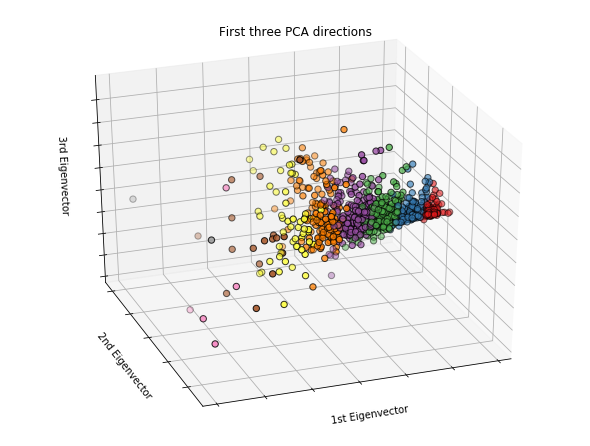

In [43]:
# For better understanding plot the first three PCA dimensions 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
x_ = PCA(n_components=3).fit_transform(df)
ax.scatter(x_[:, 0], x_[:, 1], x_[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st Eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [44]:
#from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [45]:
explained_variance = pca.explained_variance_ratio_  

In [46]:
pca = PCA(n_components=1)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test) 

In [50]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy:' ,accuracy_score(y_test, y_pred)) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.03333333333333333


In [54]:
#from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [55]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy:' ,accuracy_score(y_test, y_pred)) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.03333333333333333
